In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

In [4]:
import statistics
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
from scipy import stats

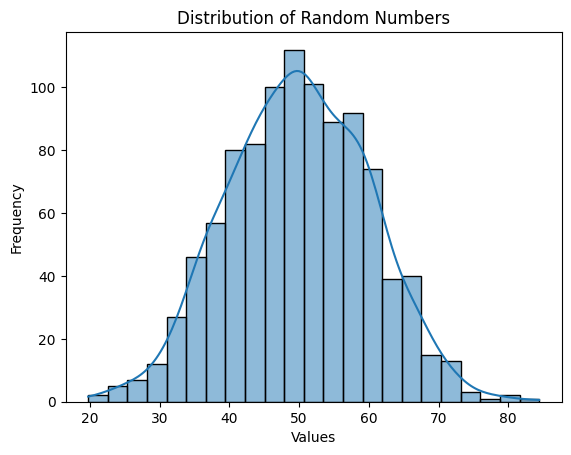

In [12]:
#Q1  Generate a dataset of random numbers. Visualize the distribution of a numerical variable.
data = np.random.normal(loc=50, scale=10, size=1000)

sns.histplot(data, kde=True)
plt.title('Distribution of Random Numbers')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

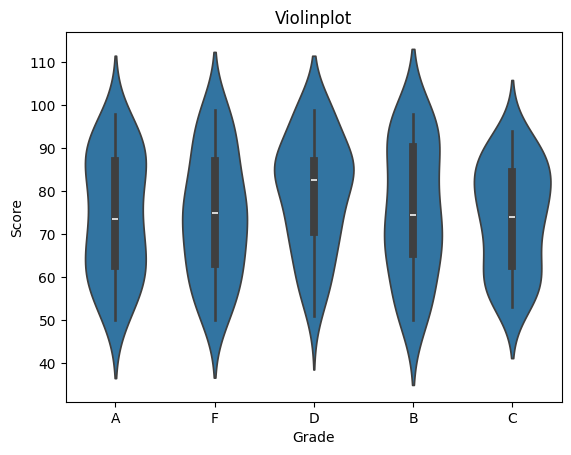

In [11]:
#Q2  Using the Student Grades, create a violin plot to display the distribution of scores across different grade categories.

np.random.seed(15)
data = {
    'Grade': np.random.choice(['A', 'B', 'C', 'D', 'F'], 200),
    'Score': np.random.randint(50, 100, 200)
}
df = pd.DataFrame(data)

sns.violinplot(x='Grade',y='Score',data=df)
plt.title("Violinplot")
plt.show()

In [17]:
#Q3  Using the given dataset, to generate a 3D scatter plot to visualize the distribution of data points in a threedimensional space.

np.random.seed(30)
data = {
    'X': np.random.uniform(-10, 10, 300),
    'Y': np.random.uniform(-10, 10, 300),
    'Z': np.random.uniform(-10, 10, 300)
}
df = pd.DataFrame(data)

fig = px.scatter_3d(df, x='X', y='Y', z='Z', title="3D Scatter Plot")
fig.show()


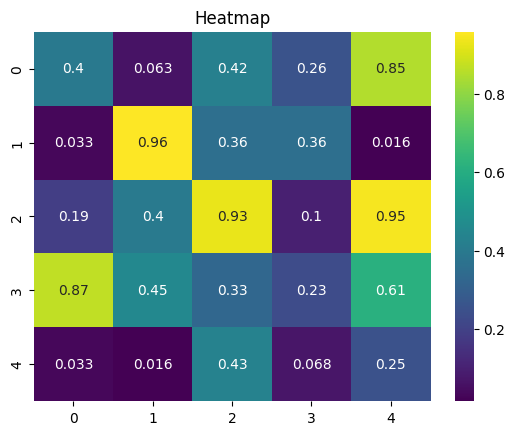

In [20]:
# Q4 Generate heatmap with some random dataset.

data = np.random.rand(5, 5)

sns.heatmap(data, annot=True, cmap='viridis')
plt.title('Heatmap')
plt.show()


In [ ]:
data_set=sns.get_dataset_names()
data_set

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
data=sns.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
d1=data['total_bill']
d1

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [ ]:
d2=data['tip']
d2

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [ ]:
sk1=data['total_bill'].skew()
sk1 #right skewed

1.1332130376158205

In [ ]:
sk2=data['tip'].skew()
sk2 #right skewed

1.4654510370979401

In [ ]:
cv=data.cov(numeric_only=True)
cv

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


In [ ]:
cv1=data['total_bill'].cov(data['tip'])
print(cv1) #covriance between two columns

8.323501629224854


In [ ]:
core=data['total_bill'].corr(data['tip'])
core #pearson correlation coeffcient

0.6757341092113641

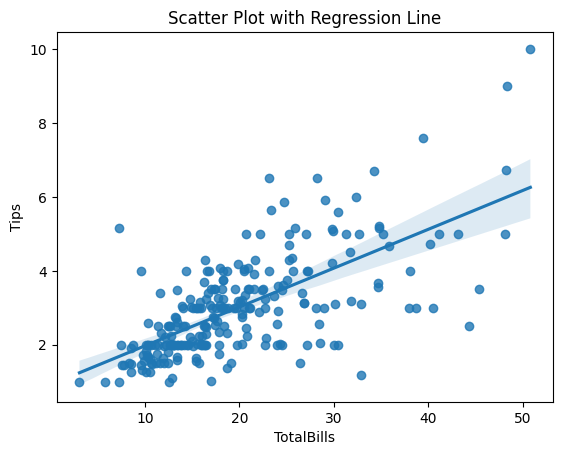

In [ ]:
sns.regplot(x='total_bill', y='tip', data=data)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('TotalBills')
plt.ylabel('Tips')
plt.show() #scatter plot with regression line

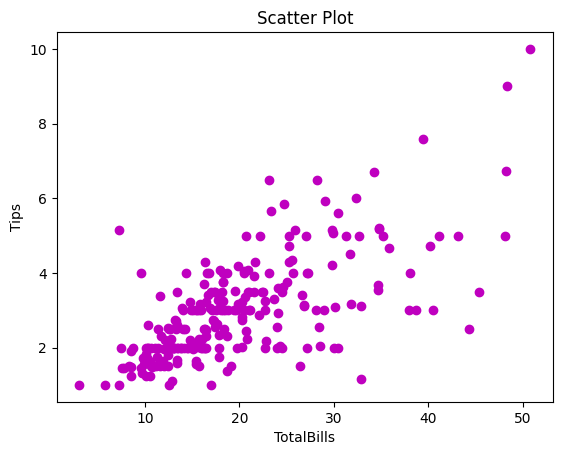

In [ ]:
plt.scatter(data['total_bill'], data['tip'],color='m')
plt.title('Scatter Plot')
plt.xlabel('TotalBills')
plt.ylabel('Tips')
plt.show()  #scatter plot

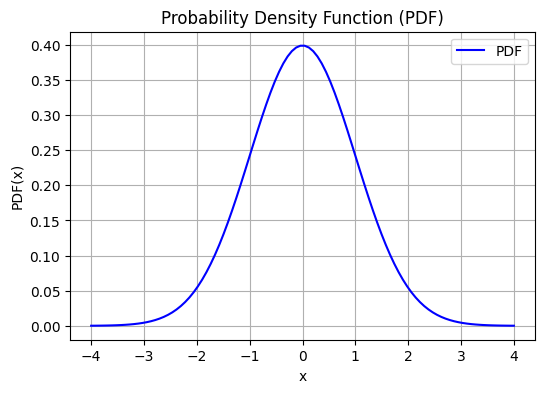

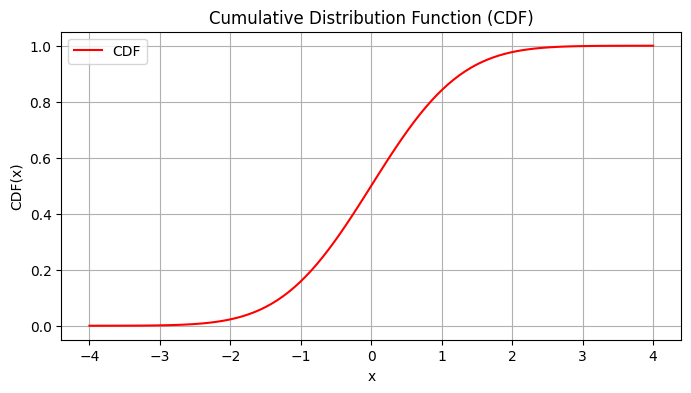

In [ ]:
# Parameters of the normal distribution
mean = 0
std_dev = 1

# Generate x-values
x = np.linspace(-4, 4, 100)

# Calculate PDF and CDF values
pdf_values = stats.norm.pdf(x, loc=mean, scale=std_dev)
cdf_values = stats.norm.cdf(x, loc=mean, scale=std_dev)

plt.figure(figsize=(6, 4))
plt.plot(x, pdf_values, 'b-', label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(x, cdf_values, 'r-', label='CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('CDF(x)')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
# Z-test
import math

null_hypothesis_value=800 #population mean
sample_mean=788
std_dev=40
sample_size=30
alpha=0.05

z_stats=(sample_mean-null_hypothesis_value)/(std_dev/math.sqrt(sample_size))
p_value=stats.norm.cdf(z_stats)
z_critical=stats.norm.ppf(alpha)

print("Z_stats is:", z_stats)
print("Z_critical is:",z_critical)
print("P-value is:", p_value)

if p_value<alpha:
  print("Reject Null Hypothesis")
else:
  print("Fail to reject null hypothesis") #One tail test

Z_stats is: -1.6431676725154982
Z_critical is: -1.6448536269514729
P-value is: 0.050174123231145375
Fail to reject null hypothesis


In [6]:
# t-test

population_mean = 58
sample_mean = 55
sample_std_dev = 5
sample_size = 12
alpha = 0.01  # Significance level

# Calculate the t-statistic
t_stat = (sample_mean - population_mean) / (sample_std_dev / math.sqrt(sample_size))

# Degrees of freedom
df = sample_size - 1

t_critical_low = stats.t.ppf(alpha / 2, df)
t_critical_high = stats.t.ppf(1 - alpha / 2, df)

p_value = 2 * stats.t.cdf(-abs(t_stat), df)  # Multiply by 2 for two-tailed test

# Output results
print(f"T-Statistic: {t_stat}")
print(f"Critical Values: ({t_critical_low}, {t_critical_high})")
print(f"P-Value: {p_value}")

if t_stat < t_critical_low or t_stat > t_critical_high:
    print("Reject the null hypothesis: The mean output differs from 58.")
else:
    print("Fail to reject the null hypothesis: Insufficient evidence to conclude the mean output differs from 58.")


T-Statistic: -2.0784609690826525
Critical Values: (-3.10580651553928, 3.1058065155392804)
P-Value: 0.06186240642303444
Fail to reject the null hypothesis: Insufficient evidence to conclude the mean output differs from 58.


In [7]:
# Chi square test

# Given data
observed = [180, 140, 180]  # observed frequencies
expected = [200, 150, 150]  # expected frequencies

# Calculate chi-square statistic
chi_square_stat, p_value = stats.chisquare(observed, expected)

df = len(observed) - 1

# Critical value for a two-tailed chi-square test at 0.05 significance level
critical_value = stats.chi2.ppf(0.975, df)

print(f"Chi-Square Statistic: {chi_square_stat}")
print(f"Critical Value: {critical_value}")
print(f"P-value: {p_value}")

if chi_square_stat > critical_value:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Chi-Square Statistic: 8.666666666666666
Critical Value: 7.377758908227871
P-value: 0.013123728736940971
Reject the null hypothesis.


In [8]:
# F-test

group1 = [25, 30, 28, 27, 29, 35, 38, 31, 34, 33]
group2 = [40, 42, 45, 38, 43, 41, 40, 44, 42, 41, 39, 43]

var_group1 = np.var(group1, ddof=1)
var_group2 = np.var(group2, ddof=1)

F_statistic = var_group1 / var_group2

df1 = len(group1) - 1
df2 = len(group2) - 1

p_value = 1 - stats.f.cdf(F_statistic, df1, df2)

print(f"Variance of Group 1: {var_group1}")
print(f"Variance of Group 2: {var_group2}")
print(f"F-Statistic: {F_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The variance of Group 1 is greater than that of Group 2.")
else:
    print("Fail to reject the null hypothesis: No evidence that the variance of Group 1 is greater.")


Variance of Group 1: 16.0
Variance of Group 2: 4.2727272727272725
F-Statistic: 3.74468085106383
P-value: 0.021584051831605167
Reject the null hypothesis: The variance of Group 1 is greater than that of Group 2.


In [9]:
#ANOVA test

diet_a = [2.1, 2.5, 3.2, 2.8, 3.0]
diet_b = [1.5, 1.8, 2.2, 2.0, 1.7]
diet_c = [3.5, 3.8, 4.0, 3.2, 3.9]

data = [diet_a, diet_b, diet_c]

f_statistic, p_value = stats.f_oneway(*data)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between the diets.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the diets.")


F-statistic: 34.61580381471385
P-value: 1.0392910479281415e-05
Reject the null hypothesis: There are significant differences between the diets.
